In [4]:
### Download the online data from Github 

import pandas as pd
import gc

%time
df_list = []
for i in range(24):
    print(i, end = " ")
    df = pd.read_csv("https://github.com/The-Exchange-Fannie-Mae/National-File-B-Sample-File/raw/master/file-b-chunk-" + str(i).zfill(2) + ".zip", header = None)
    df_list.append(df)
df_all = pd.concat(df_list)
del df_list
gc.collect()   # release memory

Wall time: 0 ns
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

0

In [6]:
### Total 47428547 records, 19 columns in each records
df_all.shape

(47428547, 19)

In [7]:
### Name the columns based on the requirements
df_all.columns = ['enterprise',"id", 'msaType', 'censusTractPctMinority', 'tractIncomeRatio',
       'borrowerIncomeRatio', 'dateAcquiredVsDateOriginated', 'loanPurpose',
       'federalGuarantee', 'sellerInstitutionType',
       'borrowerRaceOriginEthnicity', 'coborrowerRaceOriginEthnicity',
       'borrowerGender', 'coborrowerGender', 'occupancyCode', 'numberOfUnits',
       'ownerOccupied', 'affordabilityCategory', 'reportingYear']

In [5]:
### Delete useless data
df_all = df_all.drop(columns = ['id'])

In [8]:
### Modify data according to requirements, Also count different types of loan
df_all.loc[df_all['coborrowerGender'] == 5, 'coborrowerGender'] = 4
df_all['coborrowerGender'].value_counts()

4    21756457
2    19661429
1     3947460
3     1871525
9      191676
Name: coborrowerGender, dtype: int64

In [8]:
df_all.head(5)

,enterprise,msaType,censusTractPctMinority,tractIncomeRatio,borrowerIncomeRatio,dateAcquiredVsDateOriginated,loanPurpose,federalGuarantee,sellerInstitutionType,borrowerRaceOriginEthnicity,coborrowerRaceOriginEthnicity,borrowerGender,coborrowerGender,occupancyCode,numberOfUnits,ownerOccupied,affordabilityCategory,reportingYear
0,2,1,2,3,2,1,1,4,3,5,5,1,1,3,1,2,9,2008
1,2,1,2,3,3,2,1,4,1,5,5,2,1,1,1,1,9,2008
2,2,1,1,2,3,1,2,4,1,5,5,1,2,1,1,1,9,2008
3,2,1,2,3,3,1,1,4,2,9,9,1,4,1,1,1,9,2008
4,2,1,2,3,3,2,2,4,3,9,9,1,2,1,1,1,9,2008


In [9]:
### Check proportion of unique values in the same columns
for col in df_all.columns:
    print(col)
    print(df_all[col].value_counts(normalize = True)) 
    print()

enterprise
1    0.614351
2    0.385649
Name: enterprise, dtype: float64

msaType
1    0.89862
0    0.10138
Name: msaType, dtype: float64

censusTractPctMinority
2    0.384750
3    0.314075
1    0.300736
9    0.000439
Name: censusTractPctMinority, dtype: float64

tractIncomeRatio
2    0.445323
3    0.428073
1    0.125781
9    0.000822
Name: tractIncomeRatio, dtype: float64

borrowerIncomeRatio
3    0.698373
2    0.204127
1    0.085976
9    0.011524
Name: borrowerIncomeRatio, dtype: float64

dateAcquiredVsDateOriginated
1    0.875048
2    0.124949
9    0.000002
Name: dateAcquiredVsDateOriginated, dtype: float64

loanPurpose
2    0.673803
1    0.321573
9    0.004068
3    0.000336
4    0.000219
Name: loanPurpose, dtype: float64

federalGuarantee
4    9.925507e-01
3    4.003222e-03
1    2.580703e-03
2    8.653017e-04
5    8.433739e-08
Name: federalGuarantee, dtype: float64

sellerInstitutionType
3    0.500371
1    0.396610
2    0.054516
4    0.033149
5    0.015355
Name: sellerInstitutionTyp

#### According to above results, we could find:
    1. Fannie Mae loan takes up to nearly 61%, about 1.5 times than Freddie Mac.
    2. Around 90% of properties are in metropolitan area.
    3. Near 70% of the loans associated with the borrower's income ratio over 80%.
    4. Refinancing loan (67%) is over twice as many as Purchase loan (32%).
    5. Half of the mortgages are from Bank Insurance Fund (BIF)-insured depository institution.
    6. 70% of the borrowers are Caucasioan people. 
    7. 90% of the properties are owner occupied.
    8. There are higher number of loans in 2009, 20012 and 2013, which accounts for more than one third of the loans,while 2014 has the least number of loans which only take up to 6.8%.

In [9]:
# check null values
df_all.isnull().sum() 

enterprise                       0
id                               0
msaType                          0
censusTractPctMinority           0
tractIncomeRatio                 0
borrowerIncomeRatio              0
dateAcquiredVsDateOriginated     0
loanPurpose                      0
federalGuarantee                 0
sellerInstitutionType            0
borrowerRaceOriginEthnicity      0
coborrowerRaceOriginEthnicity    0
borrowerGender                   0
coborrowerGender                 0
occupancyCode                    0
numberOfUnits                    0
ownerOccupied                    0
affordabilityCategory            0
reportingYear                    0
dtype: int64

In [10]:
# Based on the "enterprise" columns to create the 'is_Fannie". 
df_all['is_Fannie'] = df_all['enterprise'] == 1 

In [13]:
df_all['is_Fannie'].value_counts(normalize = True)

True     0.614351
False    0.385649
Name: is_Fannie, dtype: float64

There are 61% of loan is Fannie

In [39]:
### delete the useless columns
del df_all['Enterprise']

KeyError: 'Enterprise'

In [21]:
value_counts = df_all['is_Fannie'].value_counts(normalize = True)

In [15]:
value_counts2 = df_all['is_Fannie'].value_counts(normalize = False)

In [16]:
value_counts2

True     29137795
False    18290752
Name: is_Fannie, dtype: int64

In [18]:
#### Draw a pie graph to see the proportion of fannie and freddie
import matplotlib.pyplot as plt

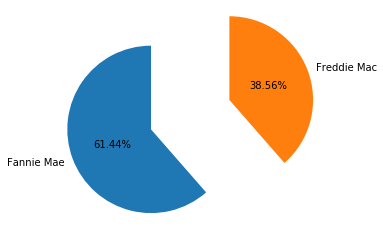

In [28]:
labels = 'Fannie Mae', 'Freddie Mac'
sizes = [value_counts[True],value_counts[False]]
explode = (0,1)  # only "explode" the 2nd slice (i.e. 'Hogs')
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.5) #数值距圆心半径倍数的距离
plt.axis('equal')
plt.show()

In [31]:
#### Check the Fannie Loans status

for col in df_all.columns[1:-1]:
    print(df_all.groupby(col)['is_Fannie'].agg(['mean', 'count']))

             mean     count
msaType                    
0        0.584617   4808299
1        0.617706  42620248
                            mean     count
censusTractPctMinority                    
1                       0.586766  14263485
2                       0.617217  18248144
3                       0.637172  14896099
9                       0.673856     20819
                      mean     count
tractIncomeRatio                    
1                 0.632398   5965624
2                 0.608218  21121042
3                 0.615384  20302902
9                 0.638190     38979
                         mean     count
borrowerIncomeRatio                    
1                    0.629119   4077731
2                    0.622158   9681450
3                    0.612810  33122803
9                    0.459316    546563
                                  mean     count
dateAcquiredVsDateOriginated                    
1                             0.618592  41502261
2                    

#### According to above Results
1. If the purpose of the loan is secondary mortgage, 99.57% of it is through Fannie Mae. (coded as 3 in 'loanPurpose')
2. Freddie Mac doesn't have loans with Home Improvement/Rehabilitation. (coded as 4 in 'loanPurpose').
3. If the loan is Home Equity Conversion Mortgage (HECM) or Title 1 – FHA, it is Fannie Mae loan. (coded as 3, 5 in  'federalGuarantee')
4. Fannie Mae occupied less than 25% of loans among the borrower/co-borrower who claim as two or more races.
5. From 2008 to 2017, the market share for Fannie Mae remained stable around 60%.

In [33]:
### Each year how much percentage of Fannie loan in different purpose

import numpy as np
pd.pivot_table(df_all, values='is_Fannie', index=['reportingYear'],
                    columns=['loanPurpose'], aggfunc=np.mean)

loanPurpose,1,2,3,4,9
reportingYear,,,,,
2008,0.594383,0.583315,0.507246,1.0,0.997730
2009,0.599820,0.584795,NaN,1.0,0.997669
2010,0.610576,0.604795,1.000000,1.0,0.887578
2011,0.647982,0.631019,NaN,1.0,0.000000
2012,0.700485,0.651081,NaN,1.0,0.000000
2013,0.661893,0.628738,NaN,1.0,0.000000
2014,0.602633,0.619568,NaN,1.0,NaN
2015,0.587405,0.570104,NaN,1.0,NaN
2016,0.601654,0.601693,NaN,1.0,0.000000


C:\Users\ydzco\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


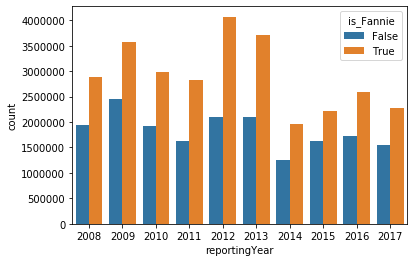

In [34]:
###graphic how many fannie loans each years

import seaborn as sns
sns.countplot(x = 'reportingYear', data = df_all, hue = 'is_Fannie')

In [43]:
##### randomly select 100000 samples for training
df = df_all.sample(100000,random_state=42)  

In [45]:
del df['id']

In [47]:
### Use one-hot coding to process categorical data.
X_dummies = []
for col in df.columns[0:-1]:
    print(col, "number of categories: ", df_all[col].value_counts().shape[0])
    df_dummies = pd.get_dummies(df[col], prefix =  col + "_is", drop_first = True)
    X_dummies.append(df_dummies)
X = pd.concat(X_dummies, axis = 1)

msaType number of categories:  2
censusTractPctMinority number of categories:  4
tractIncomeRatio number of categories:  4
borrowerIncomeRatio number of categories:  4
dateAcquiredVsDateOriginated number of categories:  3
loanPurpose number of categories:  5
federalGuarantee number of categories:  5
sellerInstitutionType number of categories:  5
borrowerRaceOriginEthnicity number of categories:  8
coborrowerRaceOriginEthnicity number of categories:  8
borrowerGender number of categories:  5
coborrowerGender number of categories:  5
occupancyCode number of categories:  3
numberOfUnits number of categories:  4
ownerOccupied number of categories:  2
affordabilityCategory number of categories:  6
reportingYear number of categories:  10


In [48]:
X.head()

,msaType_is_1,censusTractPctMinority_is_2,censusTractPctMinority_is_3,censusTractPctMinority_is_9,tractIncomeRatio_is_2,tractIncomeRatio_is_3,tractIncomeRatio_is_9,borrowerIncomeRatio_is_2,borrowerIncomeRatio_is_3,borrowerIncomeRatio_is_9,...,affordabilityCategory_is_9,reportingYear_is_2009,reportingYear_is_2010,reportingYear_is_2011,reportingYear_is_2012,reportingYear_is_2013,reportingYear_is_2014,reportingYear_is_2015,reportingYear_is_2016,reportingYear_is_2017
248479,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
343618,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1266655,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1314929,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
738211,1,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split,GridSearchCV
y = df['is_Fannie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= 42)
model_list = {} #to store the models

In [56]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.01,0.05,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)
model_list['logit_model'] = logit_model

{'C': 10}


C:\Users\ydzco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [4,6,8], "n_estimators": [200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 500}


#### Comparing analysis

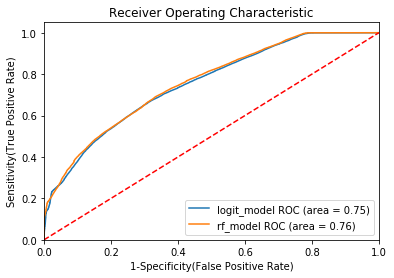

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [59]:
auc = pd.DataFrame()
for name, model in model_list.items():
    train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
    test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "train_auc"] = '{0:.2f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.2f}'.format(test_auc)
auc


,train_auc,test_auc
logit_model,0.76,0.75
rf_model,0.77,0.76
